In [59]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


path_to_src = os.path.abspath(os.path.join("c:\\Users\\user\\OneDrive\\Desktop\\see\\tenx", 'week2', 'src'))


sys.path.append(path_to_src)

In [3]:
try:
    from load_data import load_data_from_postgres
    print("Modules imported successfully")
except ModuleNotFoundError as e:
    print(f"ModuleNotFoundError: {e}")

Modules imported successfully


In [4]:

query = "SELECT * FROM xdr_data;"  


df = load_data_from_postgres(query)


if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


<connection object at 0x000001E10450CE10; dsn: 'user=postgres password=xxx dbname=Tenax host=localhost port=5432', closed: 0>


c:\Users\user\OneDrive\Desktop\see\tenx\week2\src\load_data.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [7]:
numerical_cols = df.select_dtypes(include=[np.number]).columns 

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean()) 
categorical_cols = df.select_dtypes(exclude=[np.number]).columns  
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [8]:

def find_dfs(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dfs = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return dfs


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


for column in numerical_columns:
    dfs = find_dfs(df, column)
    if not dfs.empty:
        print(f"dfs for column '{column}':")
        print(dfs)
    else:
        print(f"No dfs found for column '{column}'")


No dfs found for column 'Bearer Id'
No dfs found for column 'Start ms'
No dfs found for column 'End ms'
dfs for column 'Dur. (ms)':
           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
127750  1.311448e+19  4/27/2019 23:39     788.0  4/30/2019 23:53   411.0   
127758  7.349883e+18  4/27/2019 23:50     817.0  4/30/2019 22:09   444.0   
127836  1.311448e+19   4/28/2019 1:16     768.0  4/30/2019 21:31    17.0   
127847  1.311448e+19   4/28/2019 1:32     398.0  4/30/2019 22:31   513.0   
127860  1.311448e+19   4/28/2019

In [11]:
Average_TCP_retransmission_per_user=df.groupby('MSISDN/Number')[['TCP DL Retrans. Vol (Bytes)', 'TCP DL Retrans. Vol (Bytes)']].mean().sum(axis=1)
Average_RTT_retransmission_per_user=df.groupby('MSISDN/Number')[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean().sum(axis=1)
handset_type_per_user = df.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
Average_throughput_retransmission_per_user=df.groupby('MSISDN/Number')[['DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',"DL TP > 1 Mbps (%)","250 Kbps < DL TP < 1 Mbps (%)",'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',"50 Kbps < UL TP < 300 Kbps (%)","UL TP > 300 Kbps (%)"]].mean().sum(axis=1)


In [13]:
Aggregate_per_customer=pd.DataFrame({
    "Average_TCP_retransmission_per_user": Average_TCP_retransmission_per_user,
    "Average_RTT_retransmission_per_user": Average_RTT_retransmission_per_user,
    "handset_type_per_user": handset_type_per_user,
    "Average_throughput_retransmission_per_user": Average_throughput_retransmission_per_user


    
    
   

})
Aggregate_per_customer


,Average_TCP_retransmission_per_user,Average_RTT_retransmission_per_user,handset_type_per_user,Average_throughput_retransmission_per_user
MSISDN/Number,,,,
3.360100e+10,4.161983e+07,46.000000,Huawei P20 Lite Huawei Nova 3E,200.000000
3.360100e+10,4.161983e+07,31.000000,Apple iPhone 7 (A1778),200.000000
3.360100e+10,4.161983e+07,127.458589,undefined,200.000000
3.360101e+10,2.132000e+03,84.000000,Apple iPhone 5S (A1457),200.000000
3.360101e+10,3.015954e+07,59.500000,Apple iPhone Se (A1723),198.000000
...,...,...,...,...
3.379000e+10,4.161983e+07,40.000000,Apple iPhone 8 Plus (A1897),200.000000
4.188282e+10,3.310063e+07,309.123982,Huawei B528S-23A,198.179683
3.197021e+12,4.161983e+07,127.458589,Quectel Wireless. Quectel Ec25-E,199.533802


In [36]:
Merged_Column_tcp= pd.concat([df['TCP DL Retrans. Vol (Bytes)'], df['TCP DL Retrans. Vol (Bytes)']])
Merged_Column__RTT= pd.concat([df['Avg RTT DL (ms)'], df['Avg RTT UL (ms)']])
Merged_Column__Throughput= pd.concat([df['DL TP < 50 Kbps (%)'], df['50 Kbps < DL TP < 250 Kbps (%)'],df["DL TP > 1 Mbps (%)"],df["250 Kbps < DL TP < 1 Mbps (%)"],df['UL TP < 10 Kbps (%)'], df['10 Kbps < UL TP < 50 Kbps (%)'],df["50 Kbps < UL TP < 300 Kbps (%)"],df["UL TP > 300 Kbps (%)"]])


TCP_RTT_retransmission=pd.DataFrame(
    {
        "Merged_Column_tcp": Merged_Column_tcp,
        "Merged_Column__RTT": Merged_Column__RTT
       

    }
)
troughput_retransmission=pd.DataFrame({
    "Merged_Column__Throughput": Merged_Column__Throughput
})



,Merged_Column__Throughput
0,100.000000
1,100.000000
2,100.000000
3,100.000000
4,100.000000
...,...
149996,0.000000
149997,0.000000
149998,0.000000
149999,0.000000


In [37]:

bottom_10_tcp_value = TCP_RTT_retransmission['Merged_Column_tcp'].nsmallest(10)
bottom_10_tcp_value

59717     2.0
125094    2.0
59717     2.0
125094    2.0
2850      4.0
39610     4.0
52488     4.0
60376     4.0
60426     4.0
75093     4.0
Name: Merged_Column_tcp, dtype: float64

In [38]:

top_10_tcp_value = TCP_RTT_retransmission['Merged_Column_tcp'].nlargest(10)
top_10_tcp_value

77979     4.294426e+09
77979     4.294426e+09
135678    4.291380e+09
135678    4.291380e+09
34645     4.289877e+09
34645     4.289877e+09
140813    4.289488e+09
140813    4.289488e+09
3782      4.288060e+09
3782      4.288060e+09
Name: Merged_Column_tcp, dtype: float64

In [39]:
frequency_tcp = TCP_RTT_retransmission['Merged_Column_tcp'].value_counts()
frequency_tcp.head(10)


Merged_Column_tcp
2.080991e+07    176292
1.330000e+03       866
2.660000e+03       438
3.800000e+01       400
9.200000e+01       384
1.318000e+03       312
5.430000e+02       266
3.990000e+03       228
7.600000e+01       216
5.320000e+03       204
Name: count, dtype: int64

In [41]:
frequency_RTT = TCP_RTT_retransmission['Merged_Column__RTT'].value_counts()
frequency_RTT.head(10)

Merged_Column__RTT
109.795706    27829
17.662883     27812
5.000000      14666
2.000000      14278
1.000000      12826
4.000000      10244
3.000000       7935
6.000000       7521
28.000000      4358
27.000000      4246
Name: count, dtype: int64

In [42]:

bottom_10_RTT_value = TCP_RTT_retransmission['Merged_Column__RTT'].nsmallest(10)
bottom_10_RTT_value

42612     0.0
52225     0.0
60152     0.0
61152     0.0
61345     0.0
103328    0.0
124544    0.0
142526    0.0
143878    0.0
54        0.0
Name: Merged_Column__RTT, dtype: float64

In [44]:
top_10_RTT_value = TCP_RTT_retransmission['Merged_Column__RTT'].nlargest(10)
top_10_RTT_value

30166     96923.0
29927     64640.0
17910     55811.0
5989      54847.0
22851     26971.0
23455     26250.0
1373      25873.0
81274     25602.0
97321     25374.0
100584    24733.0
Name: Merged_Column__RTT, dtype: float64

In [45]:
frequency_troughput = troughput_retransmission['Merged_Column__Throughput'].value_counts()
frequency_troughput.head(10)

Merged_Column__Throughput
0.0      720744
100.0    178709
1.0       39139
99.0      28028
2.0       25504
3.0       18538
98.0      16652
4.0       14376
5.0       11766
97.0      10164
Name: count, dtype: int64

In [46]:
top_10_troughput_value = troughput_retransmission['Merged_Column__Throughput'].nlargest(10)
top_10_troughput_value 

0     100.0
1     100.0
2     100.0
3     100.0
4     100.0
5     100.0
6     100.0
8     100.0
10    100.0
12    100.0
Name: Merged_Column__Throughput, dtype: float64

In [47]:
bottom_10_troughput_value = troughput_retransmission['Merged_Column__Throughput'].nsmallest(10)
bottom_10_troughput_value

2462     0.0
98618    0.0
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
Name: Merged_Column__Throughput, dtype: float64

In [54]:
Average_TCP_retransmission_Handset_Type=df.groupby('Handset Type')[['TCP DL Retrans. Vol (Bytes)', 'TCP DL Retrans. Vol (Bytes)']].mean().sum(axis=1)
Average_throughput_per_Handset_Typee=df.groupby('Handset Type')[['DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',"DL TP > 1 Mbps (%)","250 Kbps < DL TP < 1 Mbps (%)",'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',"50 Kbps < UL TP < 300 Kbps (%)","UL TP > 300 Kbps (%)"]].mean().sum(axis=1)


In [64]:
Compute_handset_type=pd.DataFrame({
  "Average_TCP_retransmission_Handset_Type":Average_TCP_retransmission_Handset_Type,
  "Average_throughput_per_Handset_Typee":Average_throughput_per_Handset_Typee

  
 })
Compute_handset_type
top_10_hand_set=Compute_handset_type["Average_TCP_retransmission_Handset_Type"].nlargest(10)
top_10_hand_set_throughout=Compute_handset_type["Average_TCP_retransmission_Handset_Type"].nlargest(10)


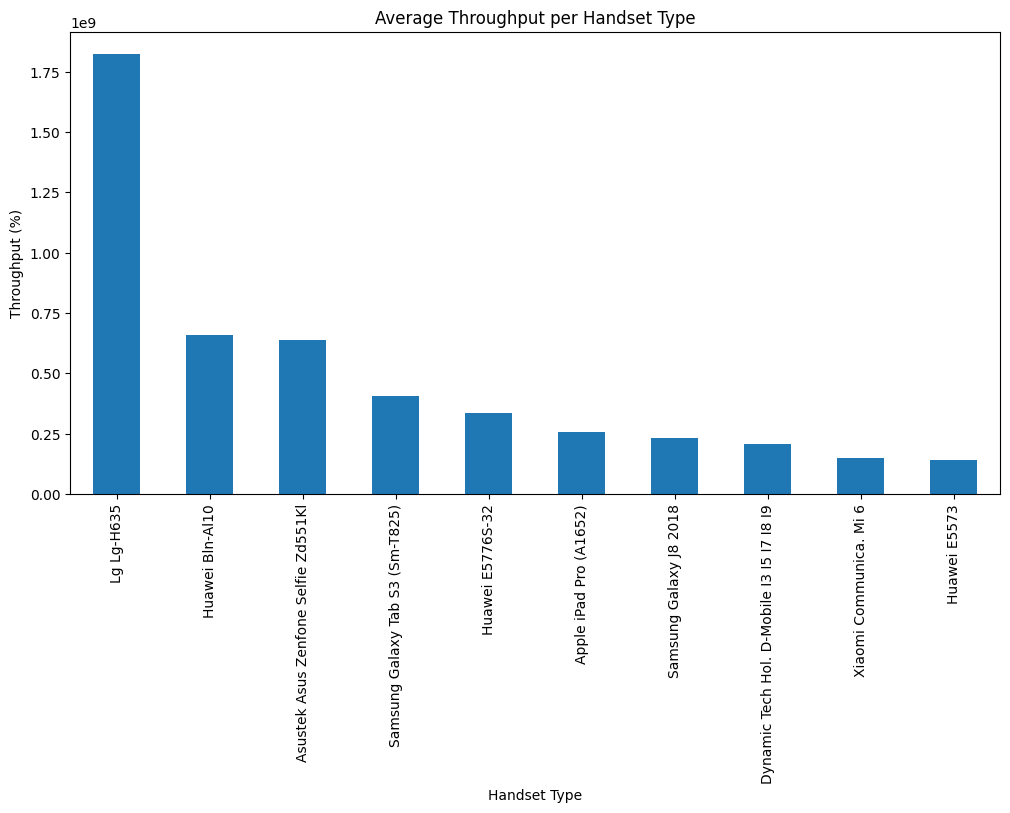

In [63]:
top_10_hand_set.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Average Throughput per Handset Type')
plt.ylabel('Throughput (%)')
plt.xlabel('Handset Type')
plt.show()

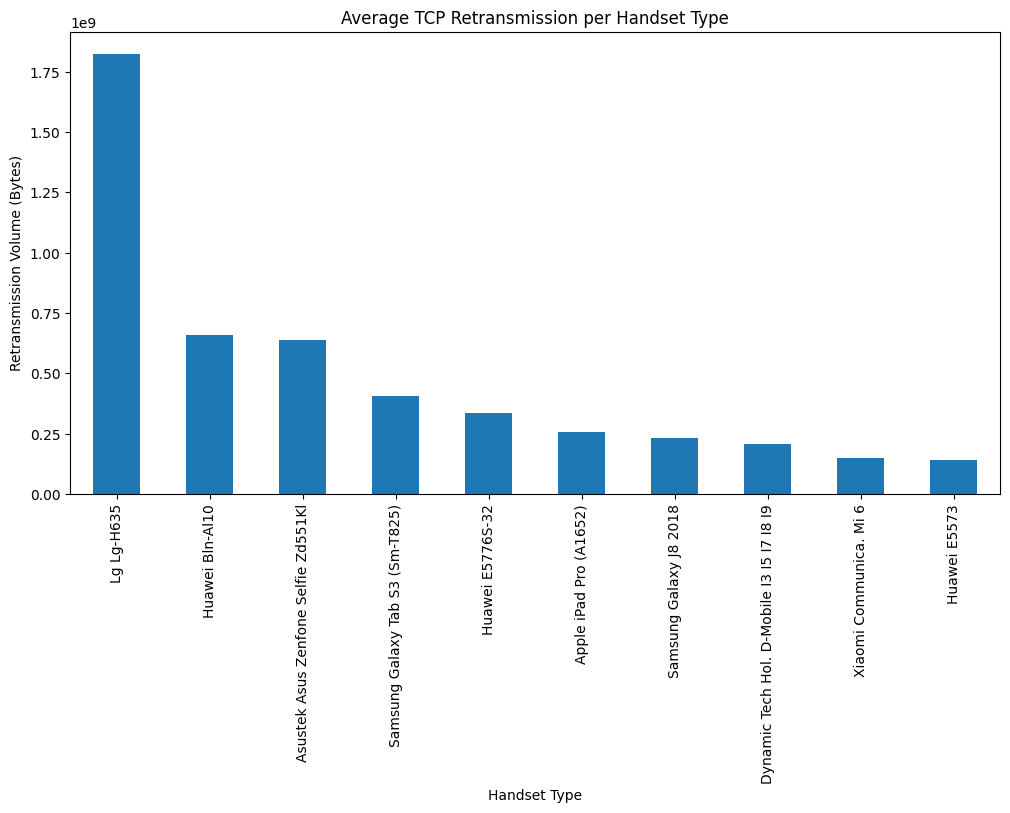

In [65]:
top_10_hand_set_throughout.plot(kind='bar', figsize=(12, 6))
plt.title('Average TCP Retransmission per Handset Type')
plt.ylabel('Retransmission Volume (Bytes)')
plt.xlabel('Handset Type')
plt.show()